# Day008
## 常用的 DataFrame 操作
* merge / transform
* subset
* groupby


請參考[pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../Data/Part01/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../Data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業

### 1. 將app_train中的CNT_CHILDREN依照下列規則分為四組，並將其結果在原本的DataFrame命名為CNT_CHILDREN_GROUP
- 0個小孩
- 1 ~ 2個小孩
- 3 ~ 5個小孩
- 超過5個小孩

利用[cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)，詳細用法參考[Pandas how to use pd.cut()](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut)


In [4]:
#1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5, app_train['CNT_CHILDREN'].max()]
labels = ['No child', '1-2 children', '3-5 children', 'more than 5']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=labels)
app_train['CNT_CHILDREN_GROUP'].value_counts()

No child        215371
1-2 children     87868
3-5 children      4230
more than 5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
# 詳細的小孩數目
for i in range(app_train['CNT_CHILDREN'].max() + 1):
    print(f"{i} children: {sum(app_train['CNT_CHILDREN'] == i)}")

0 children: 215371
1 children: 61119
2 children: 26749
3 children: 3717
4 children: 429
5 children: 84
6 children: 21
7 children: 7
8 children: 2
9 children: 2
10 children: 2
11 children: 1
12 children: 2
13 children: 0
14 children: 3
15 children: 0
16 children: 0
17 children: 0
18 children: 0
19 children: 2


### 2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

使用[groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)，用法參考[Pandas Groupby使用！](https://ithelp.ithome.com.tw/articles/10194027)

畫圖使用[boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot)

> showfliers : bool, optional (True):  Show the outliers beyond the caps.

In [6]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
No child            0         166747.010980
                    1         160804.210548
1-2 children        0         174590.584401
                    1         176115.362720
3-5 children        0         175053.742913
                    1         160677.385714
more than 5         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

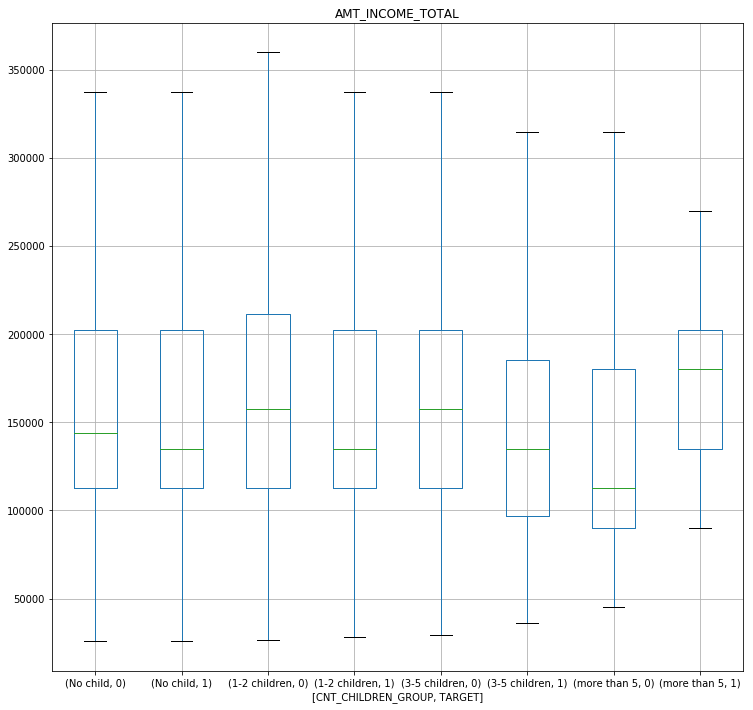

In [7]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = grp

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

### 3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [8]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
